In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('mobile price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## Data Analysis

In [3]:
#checking for nan features
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
features_nan
#no null values in our data

[]

In [4]:
#getting the numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O' and feature!='price_range']
numerical_features
#there is no categorical feature in our data

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [5]:
df[numerical_features]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [6]:
##dividing our numerical data into discrete and continuous
discrete_feature=[feature for feature in numerical_features if df[feature].dtypes=='int64']
continuous_feature=[feature for feature in numerical_features if df[feature].dtypes=='float']
#we fetched our discrete and continuous features

In [7]:
for feature in discrete_feature:
    print(feature, ':', len(df[feature].unique()))

battery_power : 1094
blue : 2
dual_sim : 2
fc : 20
four_g : 2
int_memory : 63
mobile_wt : 121
n_cores : 8
pc : 21
px_height : 1137
px_width : 1109
ram : 1562
sc_h : 15
sc_w : 19
talk_time : 19
three_g : 2
touch_screen : 2
wifi : 2


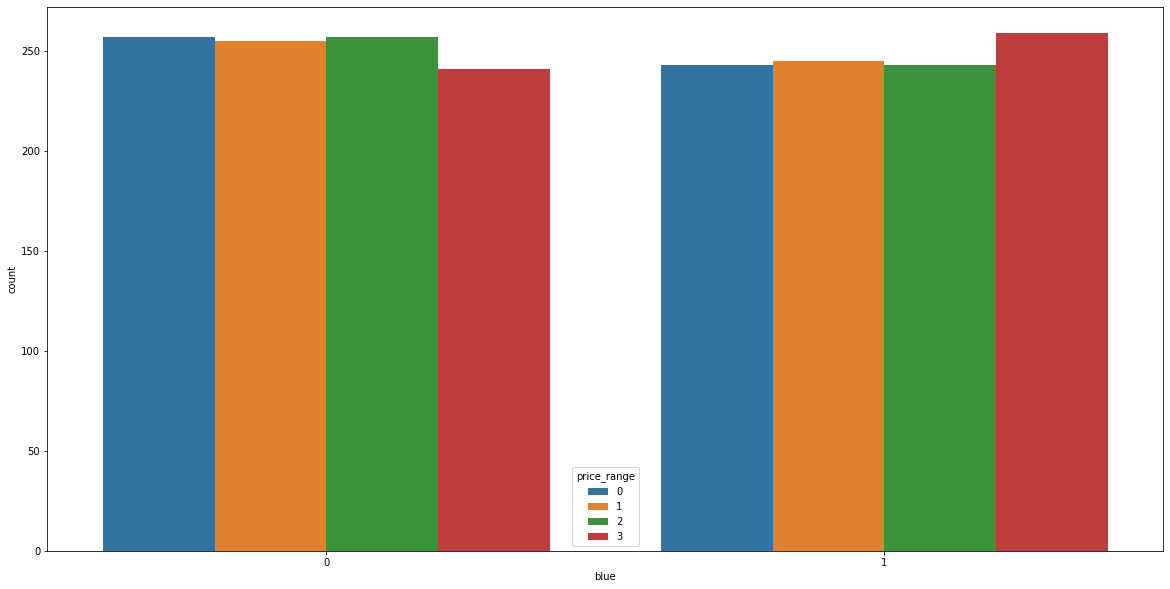

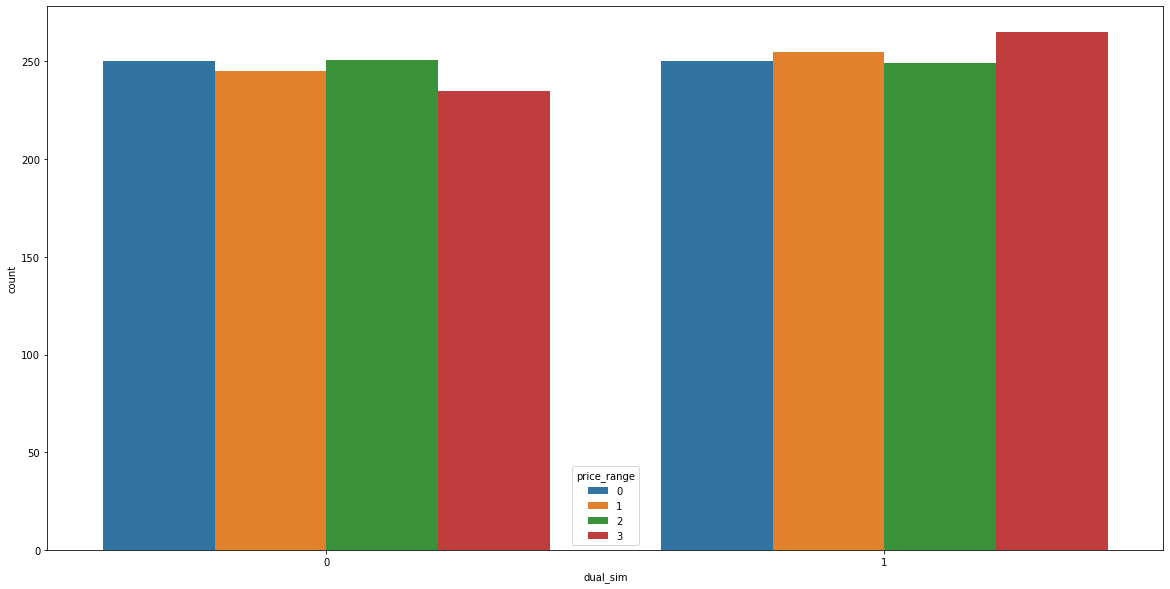

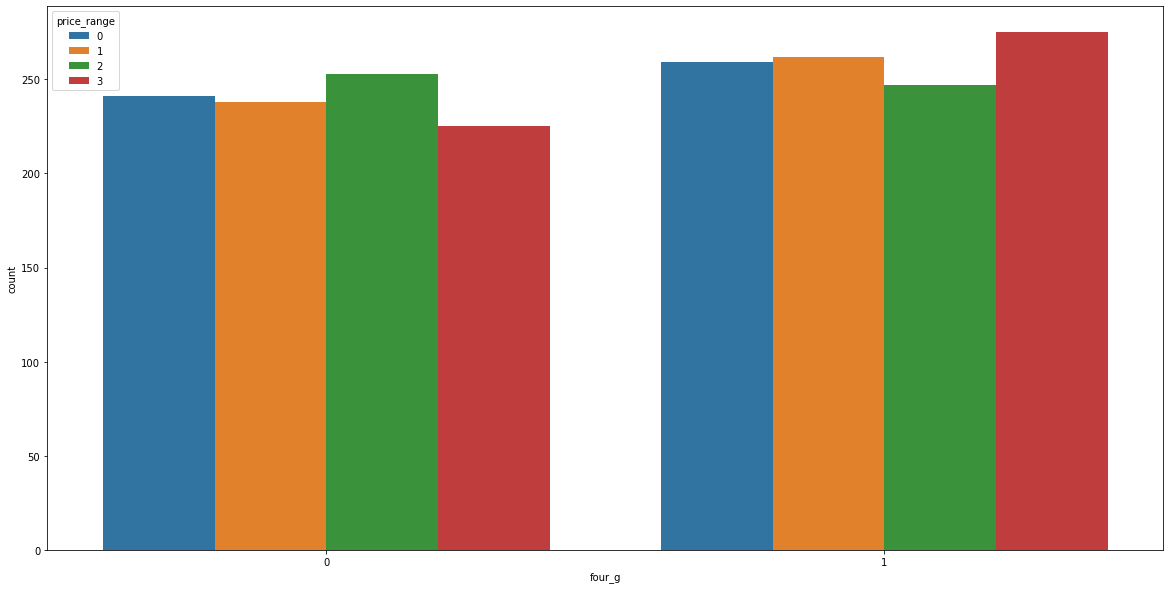

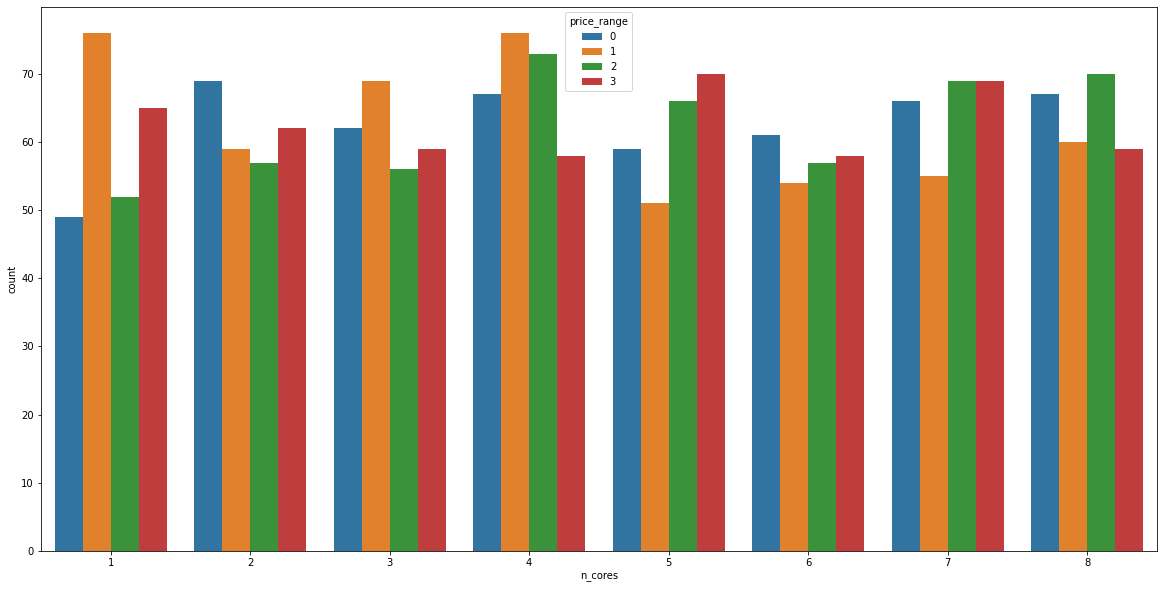

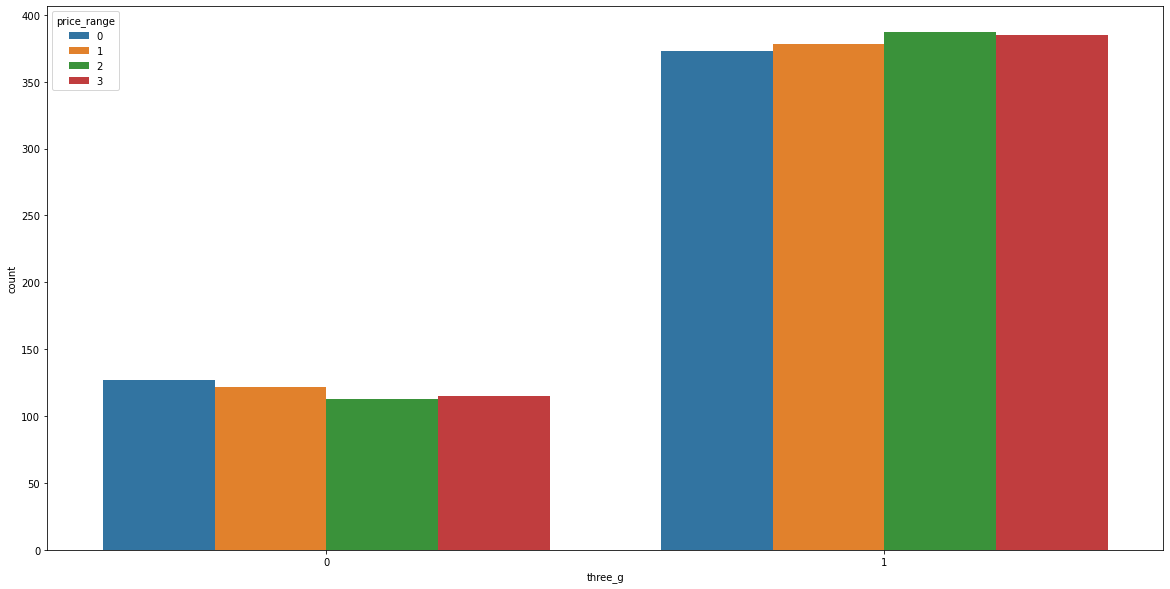

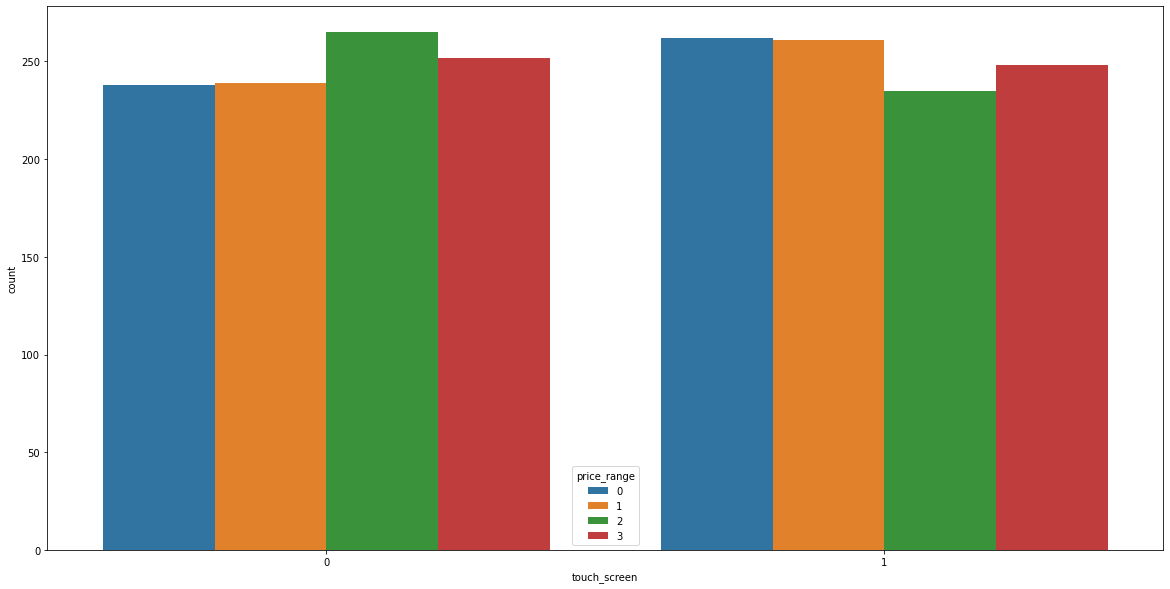

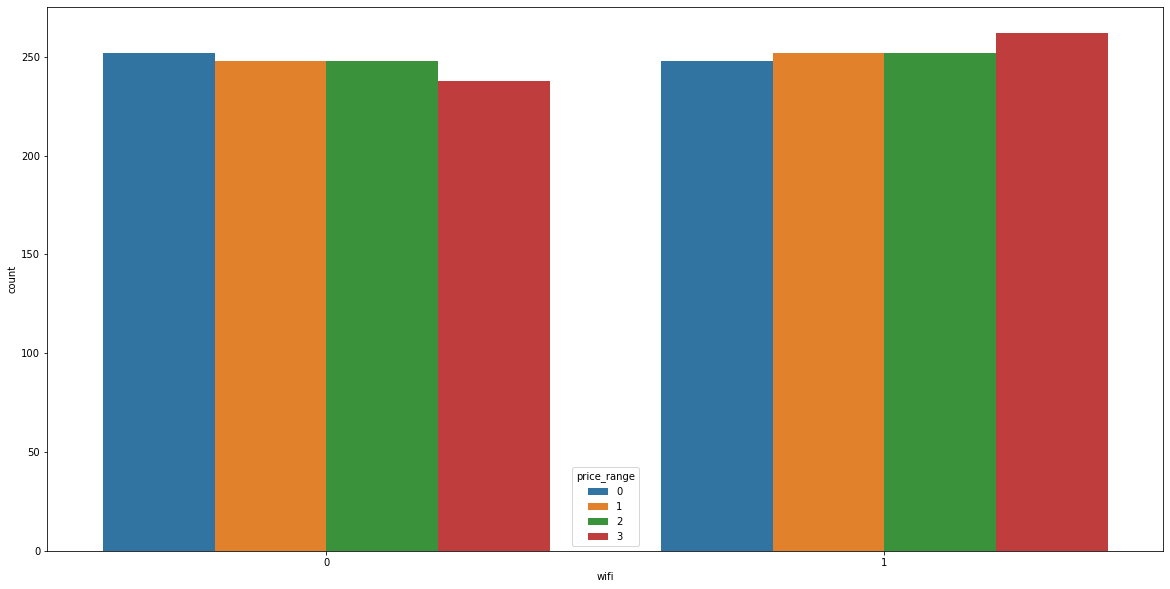

In [8]:
for feature in discrete_feature:
    if len(df[feature].unique())<10:
        plt.figure(figsize = (20,10))
        sns.countplot(x=feature, hue='price_range', data=df)
        plt.show()

#the phone with bluetooth are more expensive and the one with no blue are cheaper and are high cost as well
#phones with dual sim are also expensive in price and phone with no dual sim are cheap and of high cost as well
#phones with four_g are also expensive in price but the one with no 4g have also high cost
#in our data 4 no of cores are great in number and 6 number of cores are least
#3g phones are also great in number
#touch screen phones are also great in number
#phones with wifi are also great in number

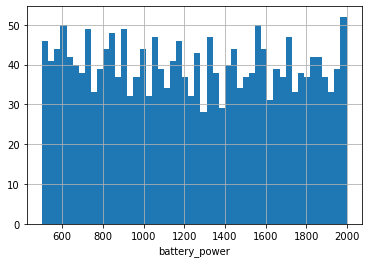

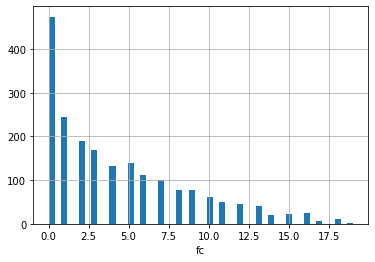

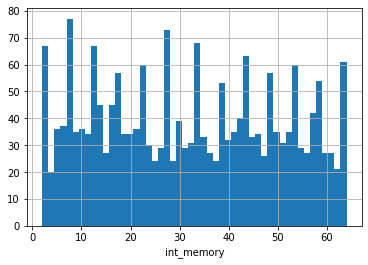

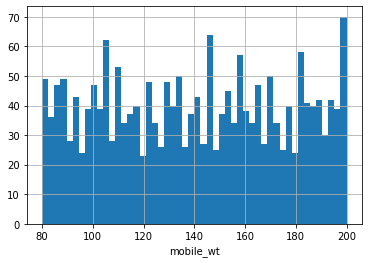

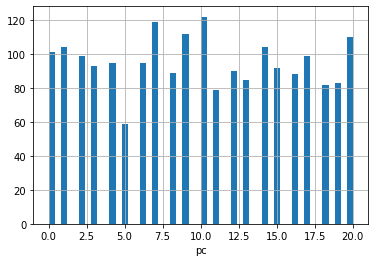

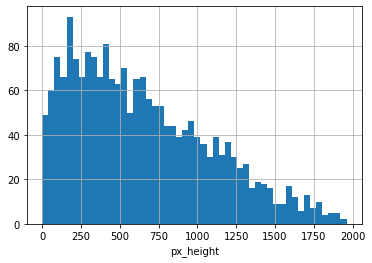

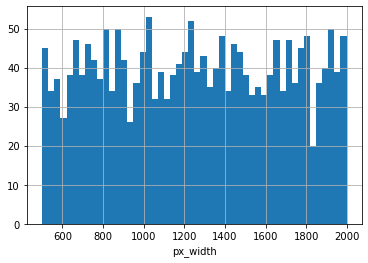

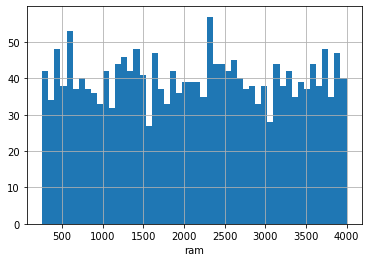

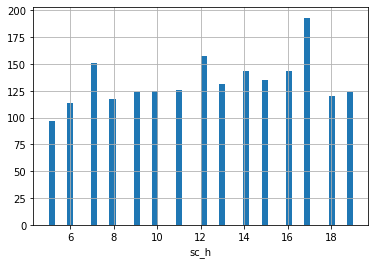

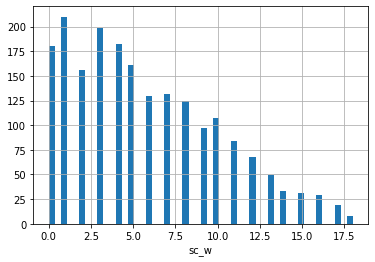

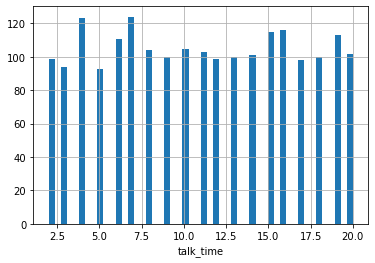

In [9]:
for feature in discrete_feature:
    if len(df[feature].unique())>10:
        df[feature].hist(bins=50)
        plt.xlabel(feature)
        plt.show()

#max battery power is 2000
#mostly fc is 0 and increasing the fc the count is decreasing
#5-10 gb internal memory phone are there in our data
#200 is the max mobile_wt
#pc has greater count of pixels as compared to the fc and max it had got of 10
#px height is around 250
#ram is in 2000-2500
#6-6.5 max talk time

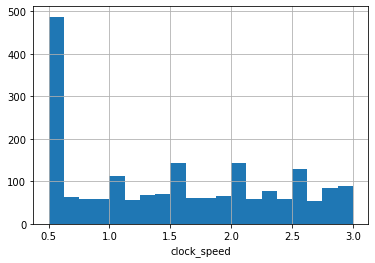

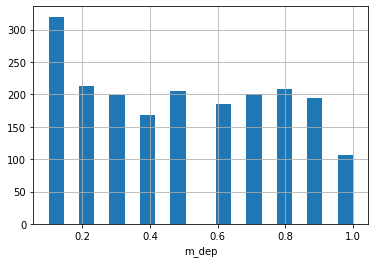

In [10]:
#continuous feature
for feature in continuous_feature:
        df[feature].hist(bins=20)
        plt.xlabel(feature)
        plt.show()

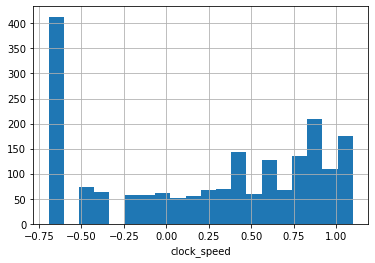

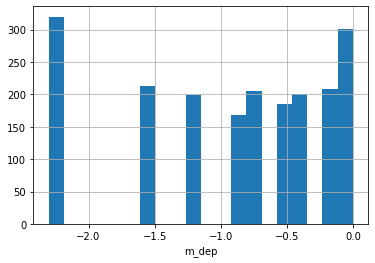

In [11]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=20)
        plt.xlabel(feature)
        plt.show()
        

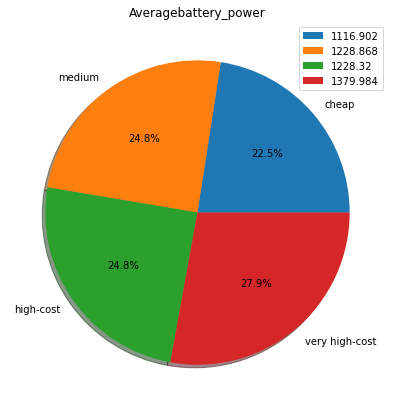

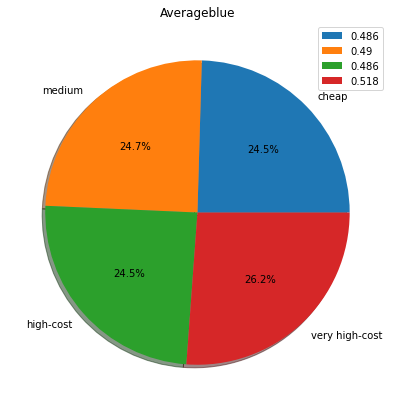

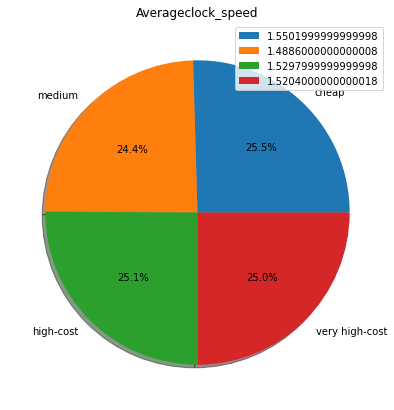

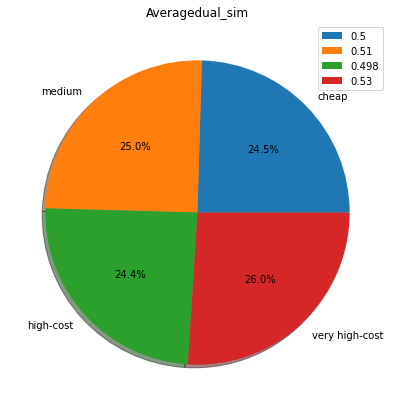

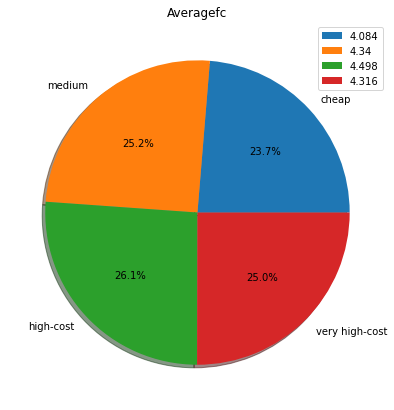

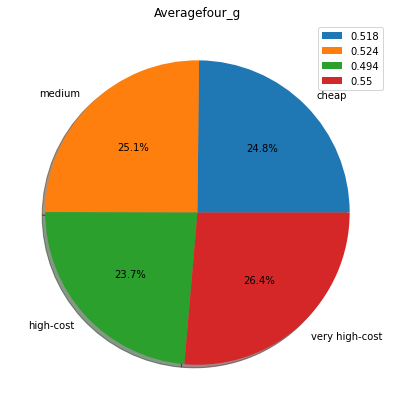

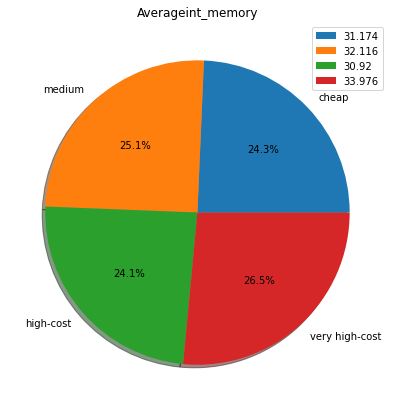

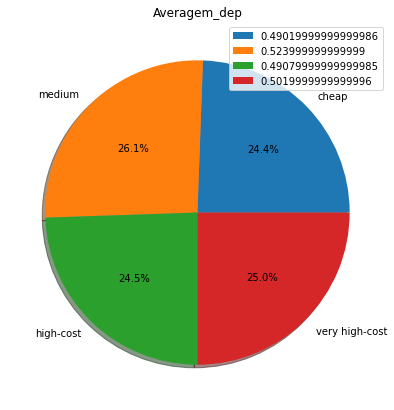

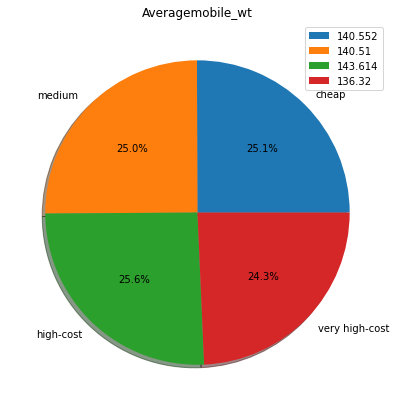

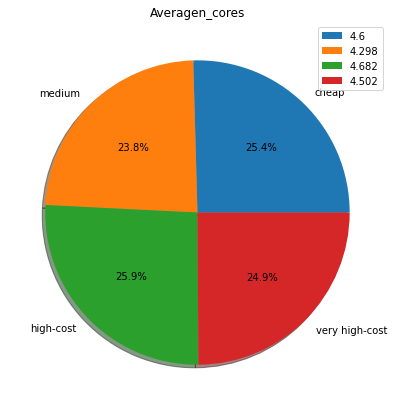

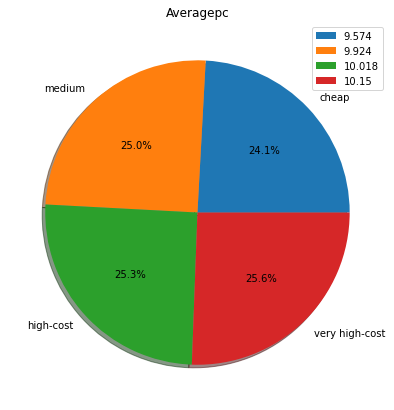

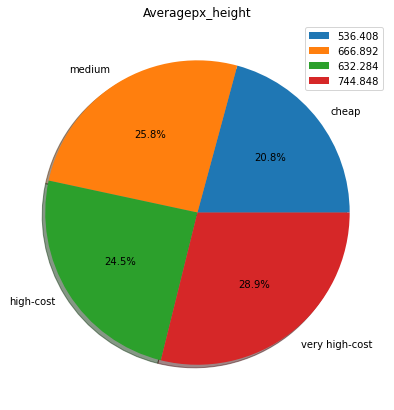

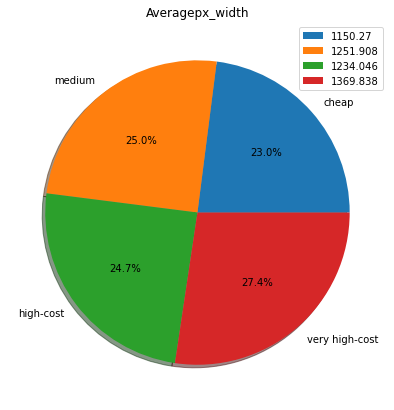

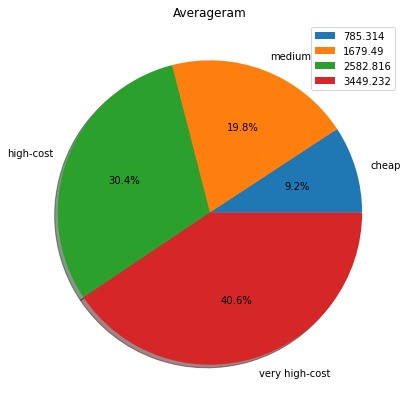

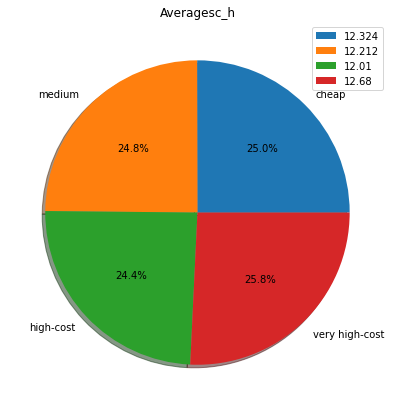

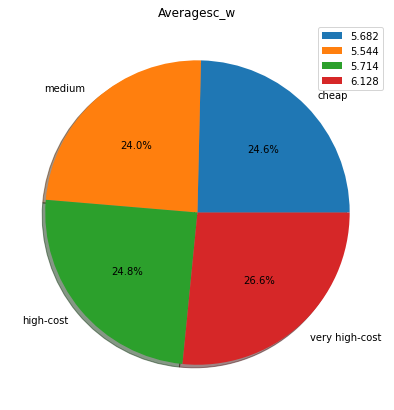

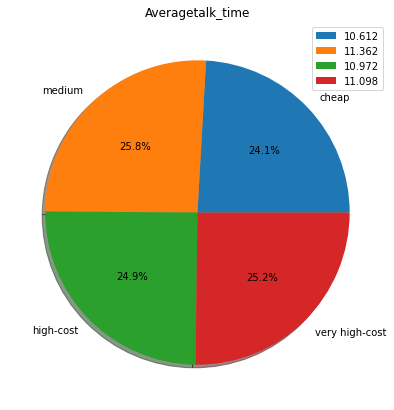

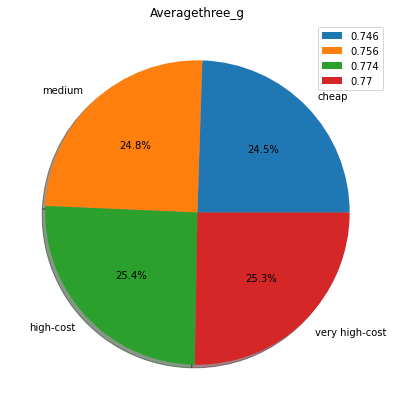

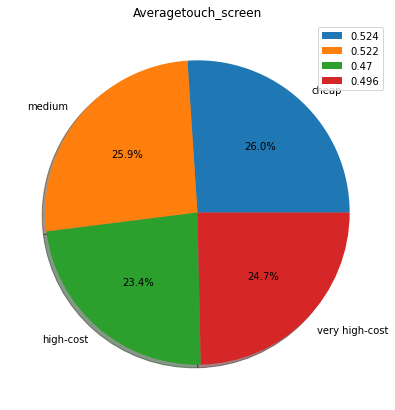

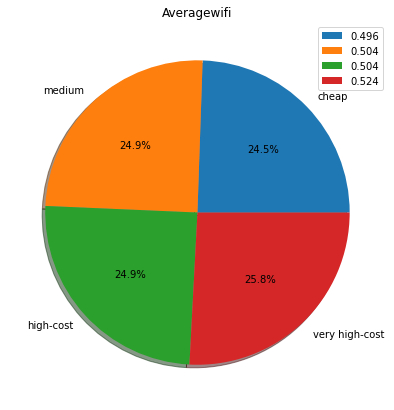

In [12]:
for feature in numerical_features:
    plt.figure(figsize=(10, 7))
    death_age = df.groupby('price_range')[feature].mean()
    plt.pie(death_age, autopct='%.1f%%', labels=['cheap','medium','high-cost','very high-cost'], shadow=True)
    plt.title('Average'+ feature)
    plt.legend(death_age, loc='upper right')
    plt.show()

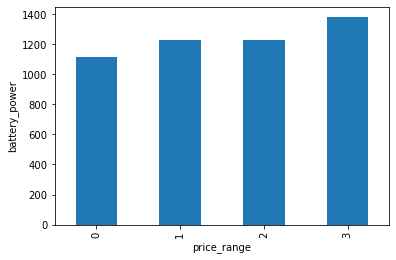

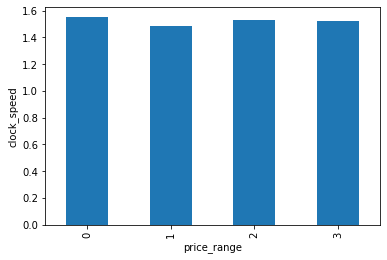

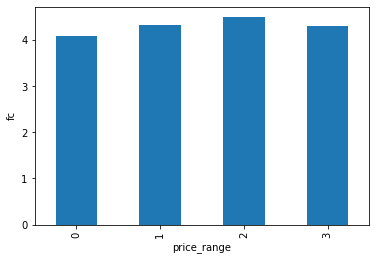

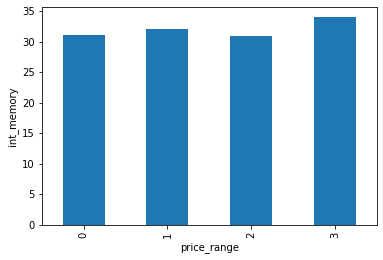

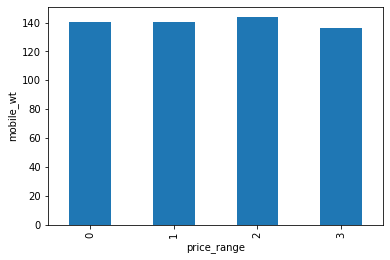

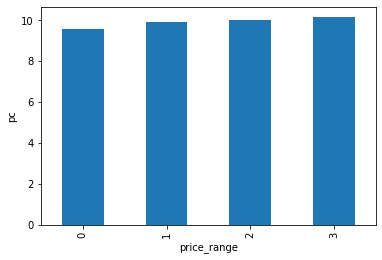

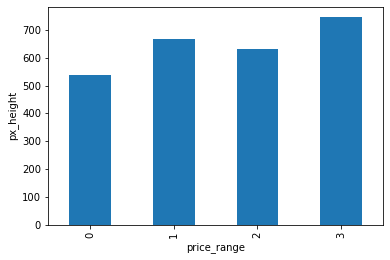

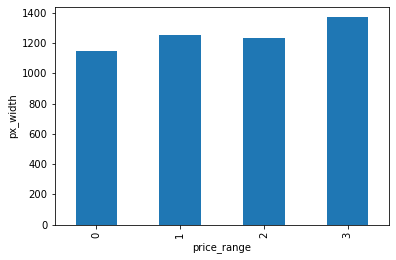

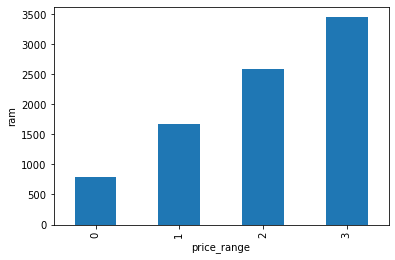

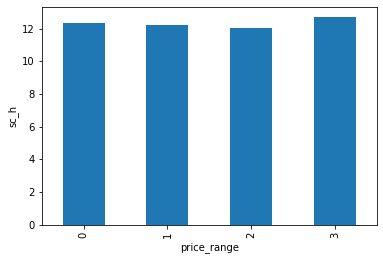

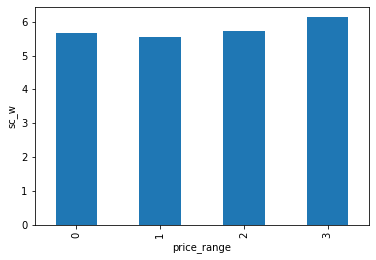

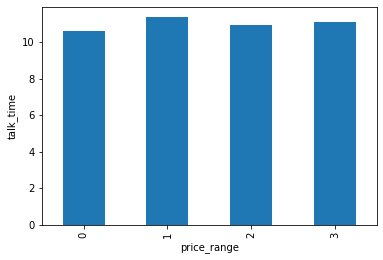

In [13]:
for feature in numerical_features:
    if len(df[feature].unique())>10:
        df.groupby(['price_range'])[feature].mean().plot.bar()
        plt.ylabel(feature)
        plt.show()

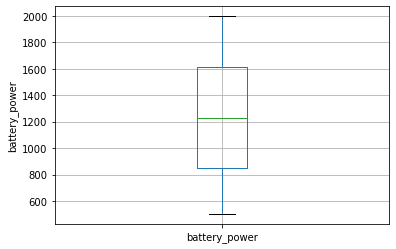

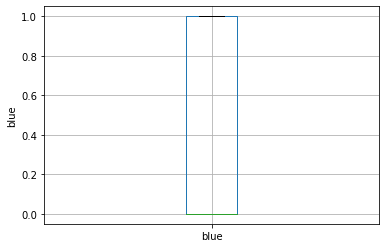

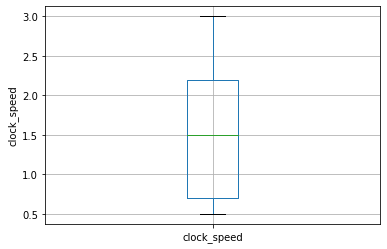

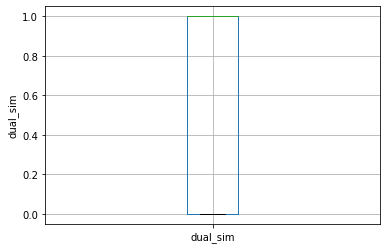

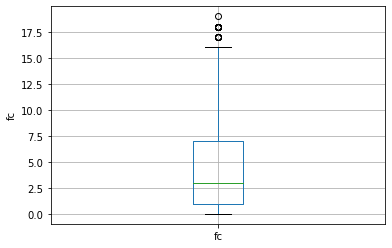

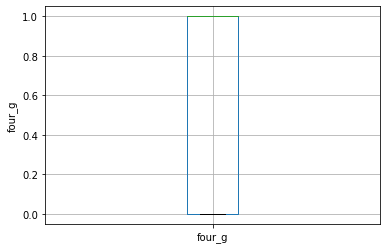

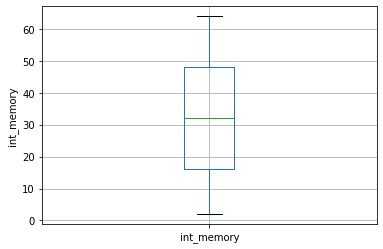

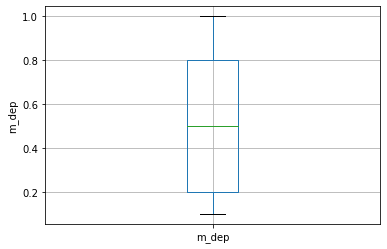

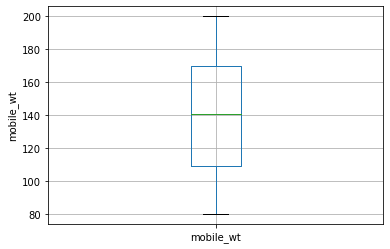

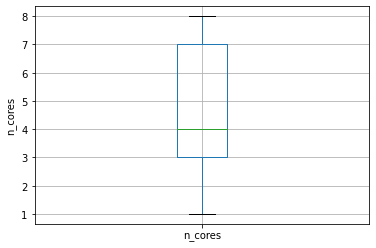

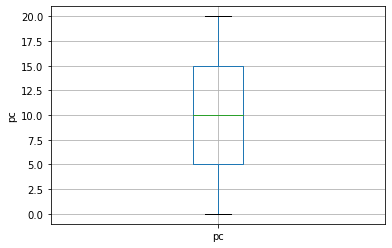

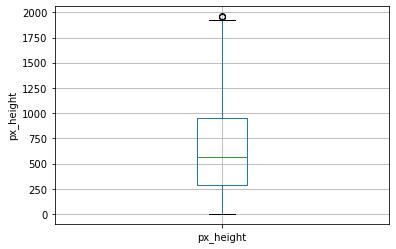

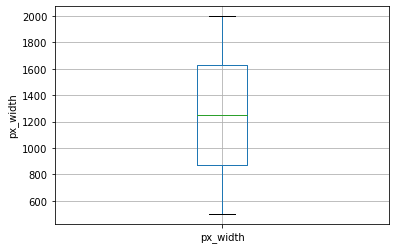

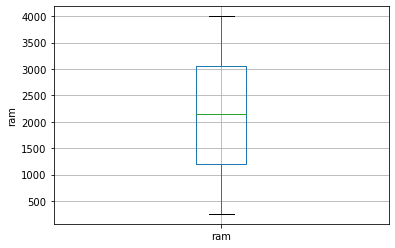

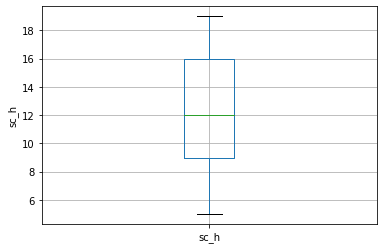

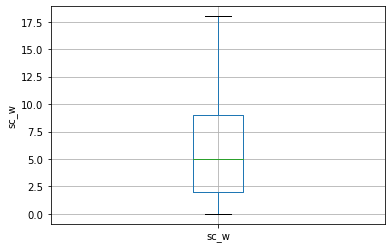

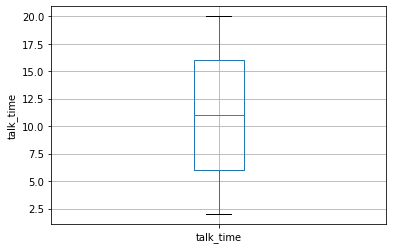

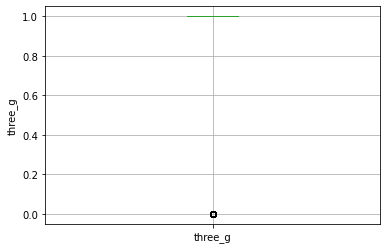

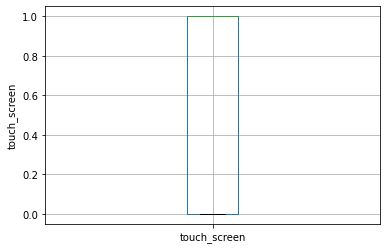

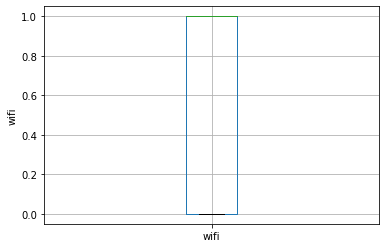

In [14]:
##outliers
for feature in numerical_features:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()
#fc shows that there is an outlier

## Feature Engineering

In [15]:
import scipy.stats as stat
#pylab is uses numpy and matplot lib which process the mathematical calculation
import pylab

In [16]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    #since subplot means 1 row, 2nd column and 1 index because there will be 2 plots
    plt.subplot(1,2,1)
    df[feature].hist()
    #since subplot means 1 row, 2nd column and 2 index
    plt.subplot(1,2,2)
    #Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution
    #dist='norm means normal distribution, plot=pylab means pylab use kro becz of math calculation'
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

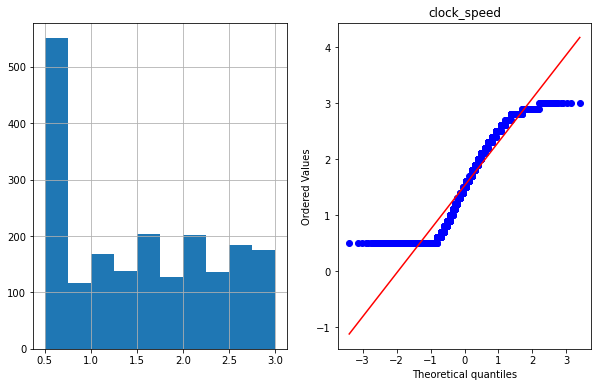

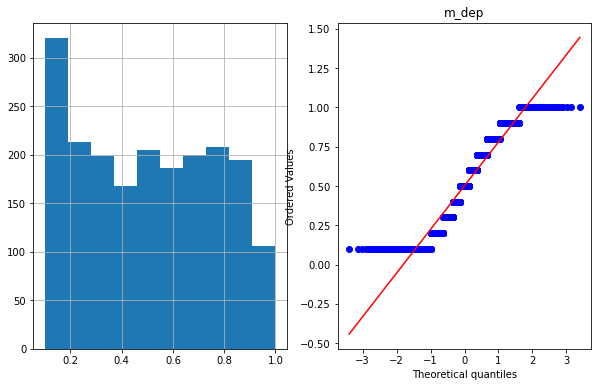

In [17]:
for feature in continuous_feature:
    plot_data(df,feature)

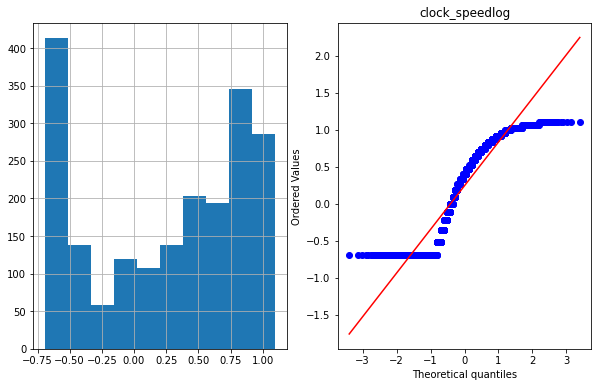

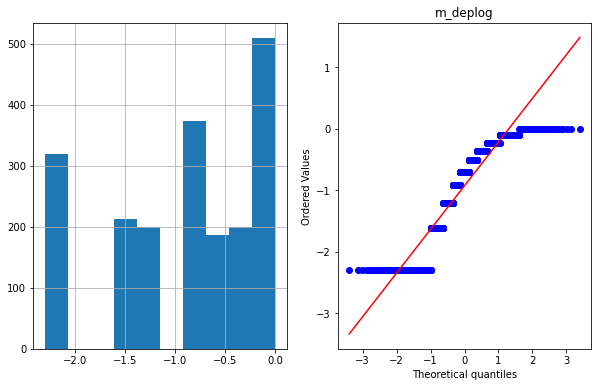

In [18]:
for feature in continuous_feature:
    data=df.copy()
    data[feature+'log']=np.log(data[feature])
    plot_data(data,feature+'log')
    

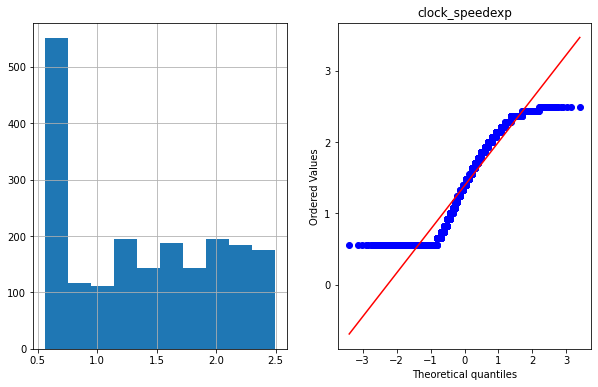

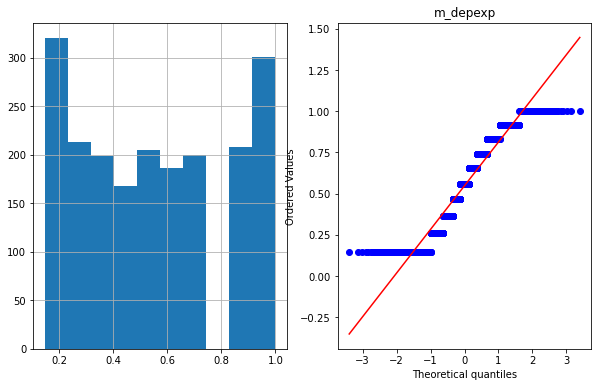

In [19]:
for feature in continuous_feature:
    data=df.copy()
    data[feature+'exp']=data[feature]**(1/1.2)
    plot_data(data,feature+'exp')

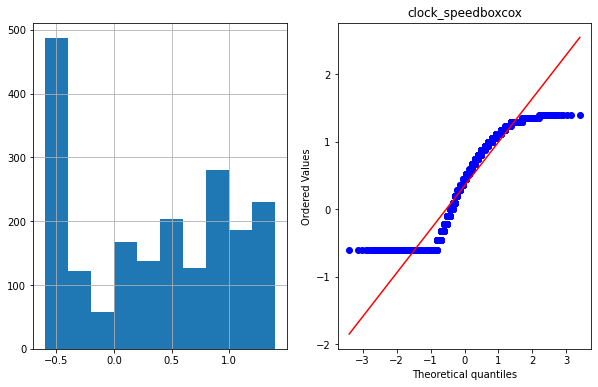

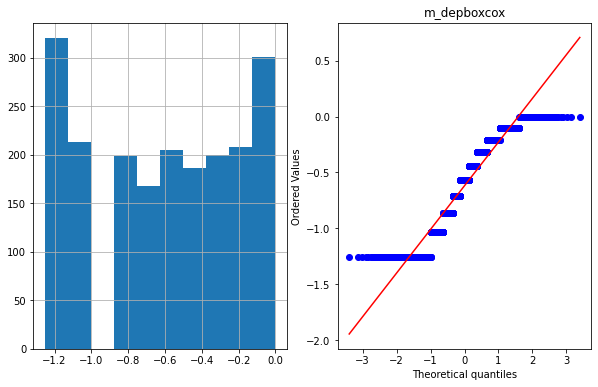

In [20]:
for feature in continuous_feature:
    data=df.copy()
    data[feature+'boxcox'],parameters=stat.boxcox(data[feature])
    plot_data(data,feature+'boxcox')

In [21]:
for feature in continuous_feature:
    df[feature],parameters=stat.boxcox(df[feature])

In [22]:
##outliers
q1 = df.fc.quantile(0.25)
q3 = df.fc.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'fc'] > toprange:
        df.loc[i, 'fc'] = toprange
    if df.loc[i, 'fc'] < botrange:
        df.loc[i, 'fc'] = botrange

<AxesSubplot:>

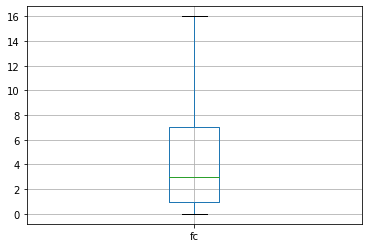

In [23]:
df.boxplot(column='fc')

In [24]:
#scaling
feature_scale=[feature for feature in df.columns if feature not in ['price_range']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [25]:
data = pd.concat([df[['price_range']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [26]:
data.head(50)

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,0.227789,0.0,0.768404,0.0,0.0625,0.0,0.080645,0.648394,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,2,0.347361,1.0,0.000000,1.0,0.0000,1.0,0.822581,0.743464,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,2,0.041416,1.0,0.000000,1.0,0.1250,1.0,0.629032,0.918467,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,2,0.076152,1.0,0.860181,0.0,0.0000,0.0,0.129032,0.833182,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,1,0.881764,1.0,0.395009,0.0,0.8125,1.0,0.677419,0.648394,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
5,1,0.907148,0.0,0.000000,1.0,0.1875,0.0,0.322581,0.743464,0.700000,0.000000,0.35,0.512245,0.770360,0.216729,0.857143,0.055556,0.444444,1.0,0.0,0.0
6,3,0.881764,0.0,0.597777,0.0,0.2500,1.0,0.129032,0.833182,0.491667,1.000000,0.50,0.194388,0.345794,0.792090,0.571429,0.444444,0.888889,1.0,0.0,1.0
7,0,0.970608,0.0,0.000000,1.0,0.0000,0.0,0.354839,0.833182,0.891667,0.428571,0.00,0.261224,0.433244,0.118653,0.785714,0.166667,0.166667,1.0,1.0,1.0
8,0,0.630595,1.0,0.000000,0.0,0.0000,0.0,0.822581,0.743464,0.783333,0.857143,0.70,0.196939,0.224299,0.225281,0.857143,0.055556,1.000000,1.0,0.0,0.0
9,0,0.005344,1.0,0.070623,1.0,0.1250,1.0,0.112903,0.000000,0.108333,0.571429,0.75,0.580102,0.483311,0.068680,1.000000,0.555556,0.555556,1.0,0.0,0.0


In [27]:
data.describe()

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.500000,0.492664,0.4950,0.474088,0.509500,0.268375,0.521500,0.484621,0.506279,0.502075,0.502929,0.495825,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000
std,1.118314,0.293533,0.5001,0.340267,0.500035,0.268501,0.499662,0.292673,0.324346,0.294997,0.326834,0.303216,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076
min,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.234302,0.0000,0.134747,0.000000,0.062500,0.000000,0.225806,0.173719,0.241667,0.285714,0.250000,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000
50%,1.500000,0.484302,0.0000,0.521440,1.000000,0.187500,1.000000,0.483871,0.546662,0.508333,0.428571,0.500000,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000
75%,2.250000,0.744322,1.0000,0.768404,1.000000,0.437500,1.000000,0.741935,0.833182,0.750000,0.857143,0.750000,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,3.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_range    2000 non-null   int64  
 1   battery_power  2000 non-null   float64
 2   blue           2000 non-null   float64
 3   clock_speed    2000 non-null   float64
 4   dual_sim       2000 non-null   float64
 5   fc             2000 non-null   float64
 6   four_g         2000 non-null   float64
 7   int_memory     2000 non-null   float64
 8   m_dep          2000 non-null   float64
 9   mobile_wt      2000 non-null   float64
 10  n_cores        2000 non-null   float64
 11  pc             2000 non-null   float64
 12  px_height      2000 non-null   float64
 13  px_width       2000 non-null   float64
 14  ram            2000 non-null   float64
 15  sc_h           2000 non-null   float64
 16  sc_w           2000 non-null   float64
 17  talk_time      2000 non-null   float64
 18  three_g 

## Feature Selection

In [31]:
X=data.iloc[:,1:]
y=data['price_range']

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [34]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)

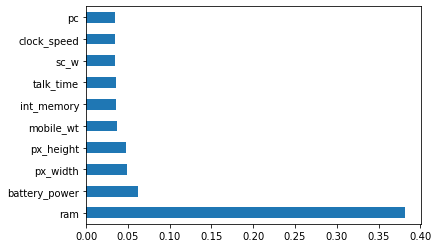

In [41]:
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

<AxesSubplot:>

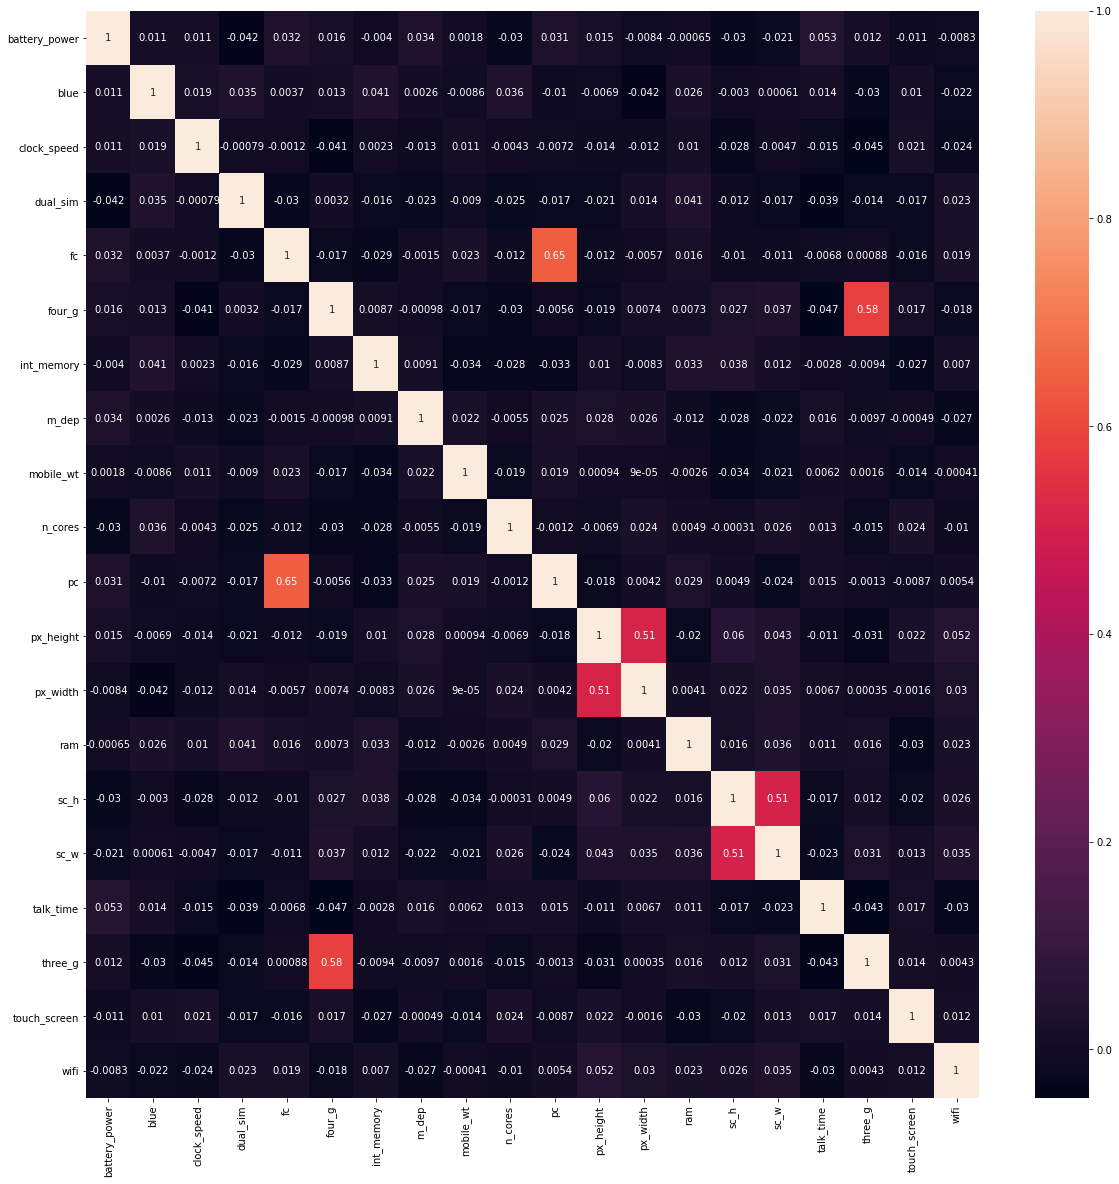

In [37]:
corr=X.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(),annot=True)

In [38]:
#here we are setting the threshold corr if the feature corr is greater than this than one of the feature will be picked
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[j, i]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
threshold=0.5
correlation(X, threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [42]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [44]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [50]:
selected_col=X.columns[feature_sel_model.get_support()]
X=X[selected_col]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 20

In [53]:
X.head()

,battery_power,dual_sim,mobile_wt,px_height,px_width,ram
0,0.227789,0.0,0.900000,0.010204,0.170895,0.612774
1,0.347361,1.0,0.466667,0.461735,0.993324,0.634687
2,0.041416,1.0,0.541667,0.644388,0.811749,0.627205
3,0.076152,0.0,0.425000,0.620408,0.858478,0.671566
4,0.881764,0.0,0.508333,0.616327,0.475300,0.308658


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

## Model

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 4000, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,20)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 471, 742, 1014, 1285, 1557, 1828, 2100, 2371, 2642, 2914, 3185, 3457, 3728, 4000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 62, 114, 166, 218, 270, 322, 374, 426, 478, 531, 583, 635, 687, 739, 791, 843, 895, 947, 1000], 'min_samples_split': [2, 5, 8, 10, 14], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8], 'criterion': ['entropy', 'gini']}


In [65]:
k_cv=KFold(n_splits=10,shuffle=True, random_state=100)

In [66]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,cv=k_cv,verbose=2,
                               random_state=100,n_jobs=1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END criterion=gini, max_depth=218, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2371; total time=   8.9s
[CV] END criterion=gini, max_depth=218, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2371; total time=   8.8s
[CV] END criterion=gini, max_depth=218, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2371; total time=   9.1s
[CV] END criterion=gini, max_depth=218, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2371; total time=   8.9s
[CV] END criterion=gini, max_depth=218, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2371; total time=   8.7s
[CV] END criterion=gini, max_depth=218, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2371; total time=   9.2s
[CV] END criterion=gini, max_depth=218, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1285; total time=   6.7s
[CV] END criterion=entropy, max_depth=531, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4000; total time=  21.6s
[CV] END criterion=entropy, max_depth=531, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4000; total time=  21.4s
[CV] END criterion=entropy, max_depth=531, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4000; total time=  21.5s
[CV] END criterion=entropy, max_depth=531, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4000; total time=  21.4s
[CV] END criterion=entropy, max_depth=531, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4000; total time=  21.4s
[CV] END criterion=entropy, max_depth=531, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4000; total time=  21.5s
[CV] END crite

[CV] END criterion=entropy, max_depth=426, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=426, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=270, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2642; total time=   9.5s
[CV] END criterion=gini, max_depth=270, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2642; total time=   9.5s
[CV] END criterion=gini, max_depth=270, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2642; total time=   9.4s
[CV] END criterion=gini, max_depth=270, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2642; total time=   9.5s
[CV] END criterion=gini, max_depth=270, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2642; total time=   9.3s
[CV] END criterion=gini, max_d

[CV] END criterion=entropy, max_depth=687, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=687, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=687, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=843, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1557; total time=   8.3s
[CV] END criterion=entropy, max_depth=843, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1557; total time=   8.4s
[CV] END criterion=entropy, max_depth=843, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1557; total time=   8.4s
[CV] END criterion=entropy, max_depth=843, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1557; total time=   8.4s
[CV] END crit

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 62, 114, 166, 218,
                                                      270, 322, 374, 426, 478,
                                                      531, 583, 635, 687, 739,
                                                      791, 843, 895, 947,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             8],
                                        'min_samples_split': [2, 5, 8, 10, 14],
                                        'n_

In [67]:
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=843, max_features='log2',
                       n_estimators=1557)

In [68]:
rf_randomcv.best_params_

{'n_estimators': 1557,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 843,
 'criterion': 'entropy'}

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,classification_report
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 94   1   0   0]
 [  3  82   7   0]
 [  0   7  84   8]
 [  0   0   6 108]]
Accuracy Score 0.92
Classification report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.91      0.89      0.90        92
           2       0.87      0.85      0.86        99
           3       0.93      0.95      0.94       114

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [71]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.91      0.89      0.90        92
           2       0.87      0.85      0.86        99
           3       0.93      0.95      0.94       114

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



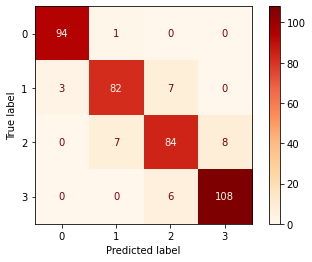

In [76]:
#to plot our results of confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_random_grid,X_test,y_test,cmap='OrRd')



In [85]:
print(roc_auc_score(y_test, rf_randomcv.predict_proba(X_test),multi_class='ovo'))

0.9905248615059828


In [94]:
X_test

,battery_power,dual_sim,mobile_wt,px_height,px_width,ram
405,0.636607,1.0,0.025000,0.127551,0.355808,0.845270
1190,0.394790,1.0,0.725000,0.238776,0.047397,0.128541
1132,0.683367,1.0,0.783333,0.078571,0.033378,0.647247
731,0.872411,0.0,0.375000,0.171939,0.590120,0.440941
1754,0.390782,1.0,0.258333,0.028571,0.433912,0.809460
...,...,...,...,...,...,...
638,0.303273,1.0,0.525000,0.636735,0.674900,0.314270
360,0.205745,0.0,0.091667,0.741327,0.818425,0.272047
1810,0.062124,0.0,0.966667,0.207653,0.018692,0.120791
1743,0.782899,0.0,0.850000,0.109184,0.119493,0.758418


In [166]:
import pickle

In [167]:
# open a file, where you ant to store the data
file = open('mobile_price_prediction.pkl', 'wb')

# dump information to that file
pickle.dump(rf_randomcv, file)

## Testing

In [163]:
#testing_1=np.array([[0.9936607],[1.0],[0.025000],[0.127551],[0.355808],[0.999999460]])
#testing_1=testing_1.reshape(1,6)
#col=np.array([X_test.columns])
#col=col.reshape(6,1)

In [164]:
#testing=pd.DataFrame(data=testing, columns=col)

In [165]:
#rf_randomcv.predict(testing_1)

array([3], dtype=int64)